In [13]:
participant_id = "P5"

In [14]:
%load_ext autoreload
%autoreload 2
from hireverse.utils.utils import *

video_file_path = os.path.join(BASE_DIR, "data/raw/videos", f"{participant_id}.avi")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from hireverse.utils.face_analyzer import FaceAnalyzer
from hireverse.schemas.frame import Frame
import numpy as np

face_analyzer = FaceAnalyzer()
frames = face_analyzer.get_video_frames(participant_id="randomId",video_path= video_file_path, target_fps=20,)

In [16]:
frames = frames[:20]

In [17]:
filtered_frames: List[Frame] = []
for frame in frames:
    frame.facial_landmarks_obj = face_analyzer.process_image_results(frame.image)
    if frame.facial_landmarks_obj:
        frame.facial_landmarks = frame.facial_landmarks_obj.landmark
        filtered_frames.append(frame)

frames = filtered_frames

In [18]:
for frame in frames:
    new_width = 640
    if frame.image.shape[1]  != new_width:
        frame.resize(new_width=new_width)

In [19]:
for frame in frames:
    frame.align_face_with_mediapipe_landmarks()

In [ ]:
for frame in frames:
    frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks, frame.image)
    x, y, w, h = frame.face
    frame.crop_frame(x, y, x + w, y+h)

In [21]:
import cv2

for frame in frames:
    frame.image =  cv2.cvtColor(frame.image, cv2.COLOR_BGR2GRAY)

In [22]:
for frame in frames:
    frame.image = np.clip(frame.image.astype('float32') / 255.0, 0.0, 1.0)

In [23]:
for frame in frames:
    frame.resize(new_width=640, new_height=640)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


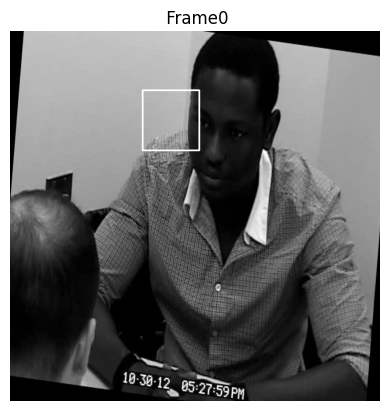

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


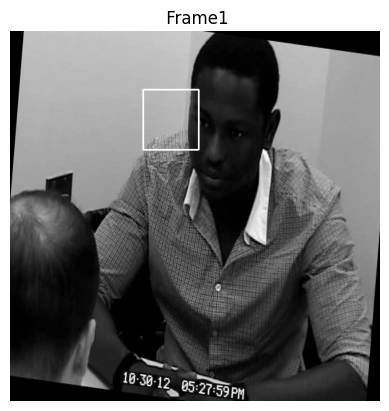

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


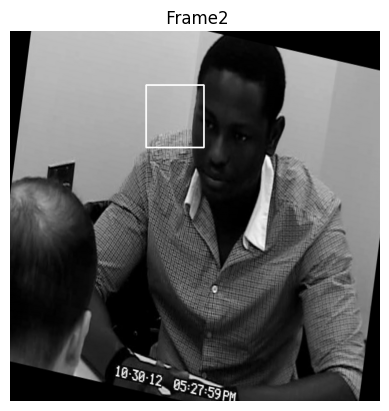

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


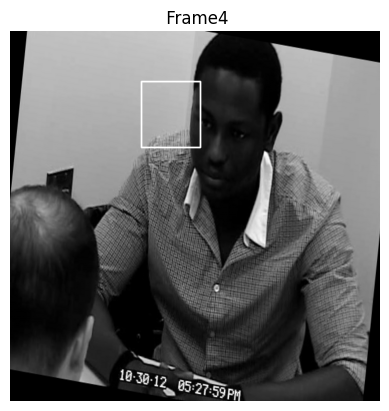

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


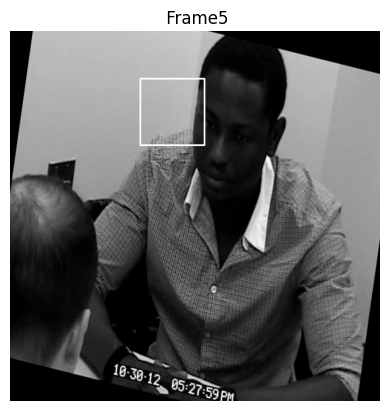

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


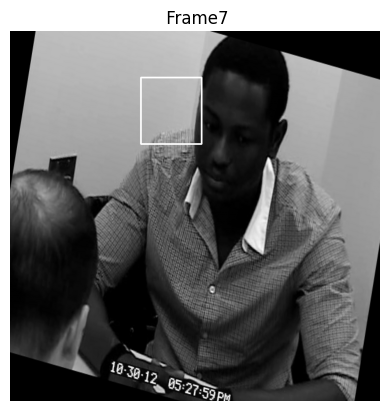

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


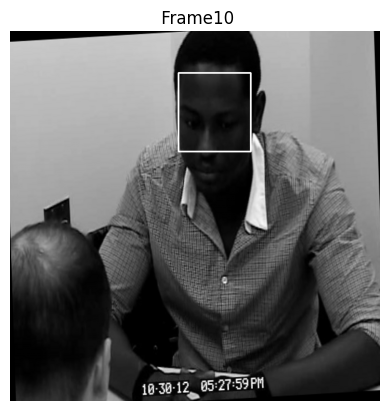

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


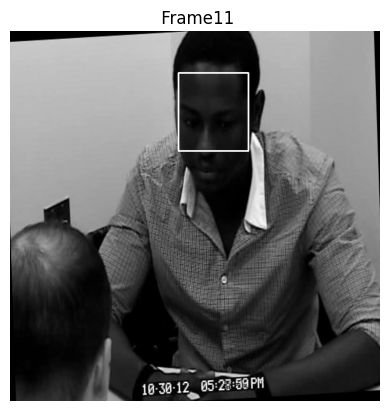

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


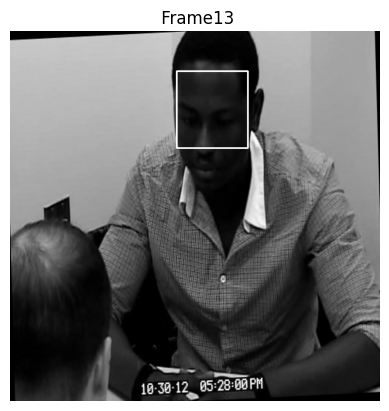

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


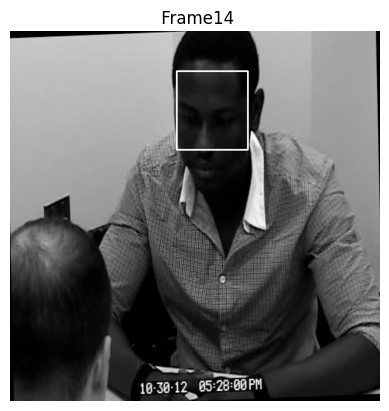

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


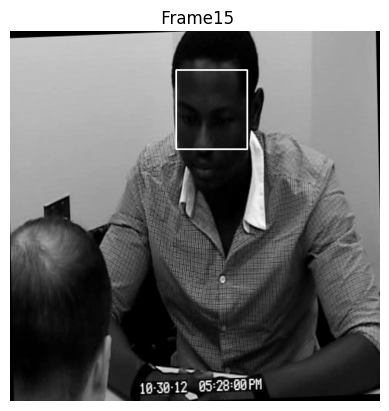

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


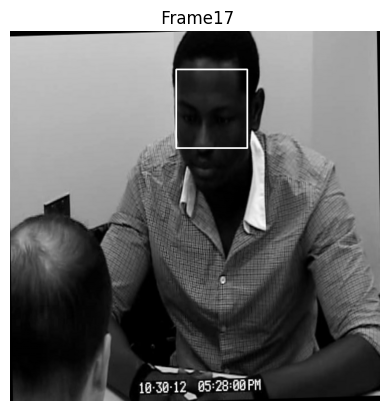

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


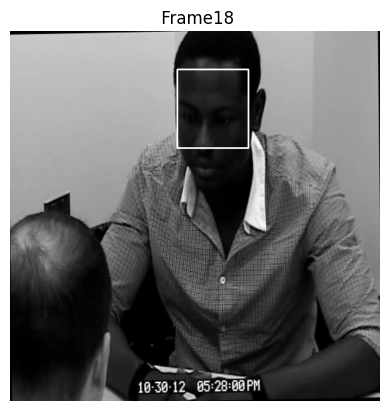

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


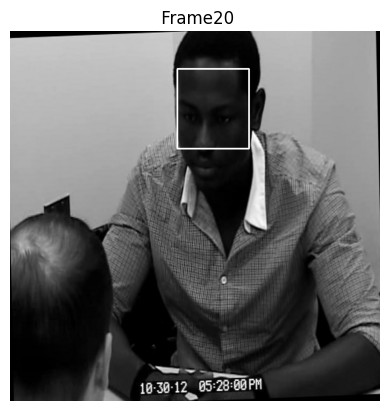

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


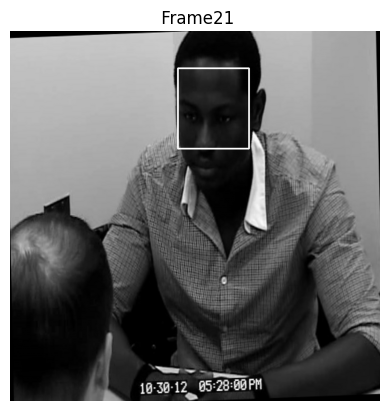

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


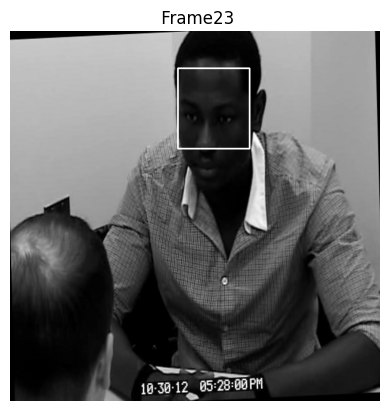

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


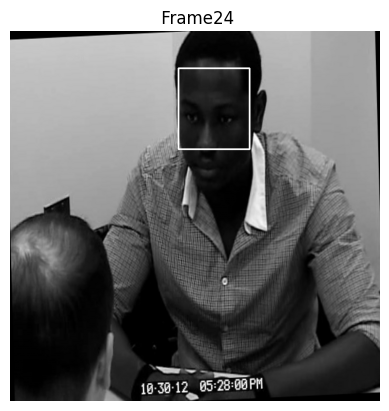

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


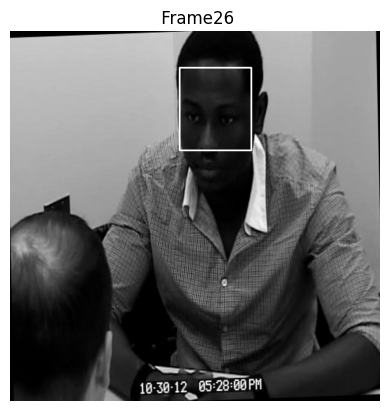

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


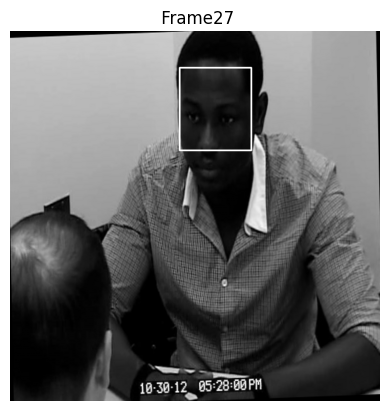

In [25]:
import numpy as np


for frame in frames[:20]:
    frame.reset_drawable_image()
    frame.draw_face_border()
    # frame.draw_facial_landmarks()
    # if frame.facial_landmarks:
    #     frame.draw_circle_at_facial_landmark(frame.facial_landmarks[10], frame.facial_landmarks[152])
    frame.display()